In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import missingno as msno 
from scipy import stats

In [16]:
df=pd.read_csv(r'C:\Users\Lenovo\Downloads\population_data.csv')
print(df.head())

   id Country (or dependency)  Population 2025 Yearly Change  Net Change  \
0   1                   India       1463865525         0.89%    12929734   
1   2                   China       1416096094        −0.23%  −3,225,184   
2   3           United States        347275807         0.54%     1849236   
3   4               Indonesia        285721236         0.79%     2233305   
4   5                Pakistan        255219554         1.57%     3950390   

   Density (P/Km²)  Land Area (Km²) Migrants (net)  Fert. Rate  Median Age  \
0              492          2973190       −495,753        1.94        28.8   
1              151          9388211       −268,126        1.02        40.1   
2               38          9147420        1230663        1.62        38.5   
3              158          1811570        −39,509        2.10        30.4   
4              331           770880     −1,235,336        3.50        20.6   

  Urban Pop % World Share  
0       37.1%      17.78%  
1       67.5%     

In [53]:
print(df)

      id Country (or dependency)  Population 2025 Yearly Change  Net Change  \
0      1                   India       1463865525         0.89%    12929734   
1      2                   China       1416096094        −0.23%  −3,225,184   
2      3           United States        347275807         0.54%     1849236   
3      4               Indonesia        285721236         0.79%     2233305   
4      5                Pakistan        255219554         1.57%     3950390   
..   ...                     ...              ...           ...         ...   
228  229              Montserrat             4359        −0.68%         −30   
229  230        Falkland Islands             3469        −0.03%          −1   
230  231                 Tokelau             2608         4.07%         102   
231  232                    Niue             1821         0.11%           2   
232  233                Holy See              501         1.01%           5   

     Density (P/Km²)  Land Area (Km²) Migrants (net

<Axes: >

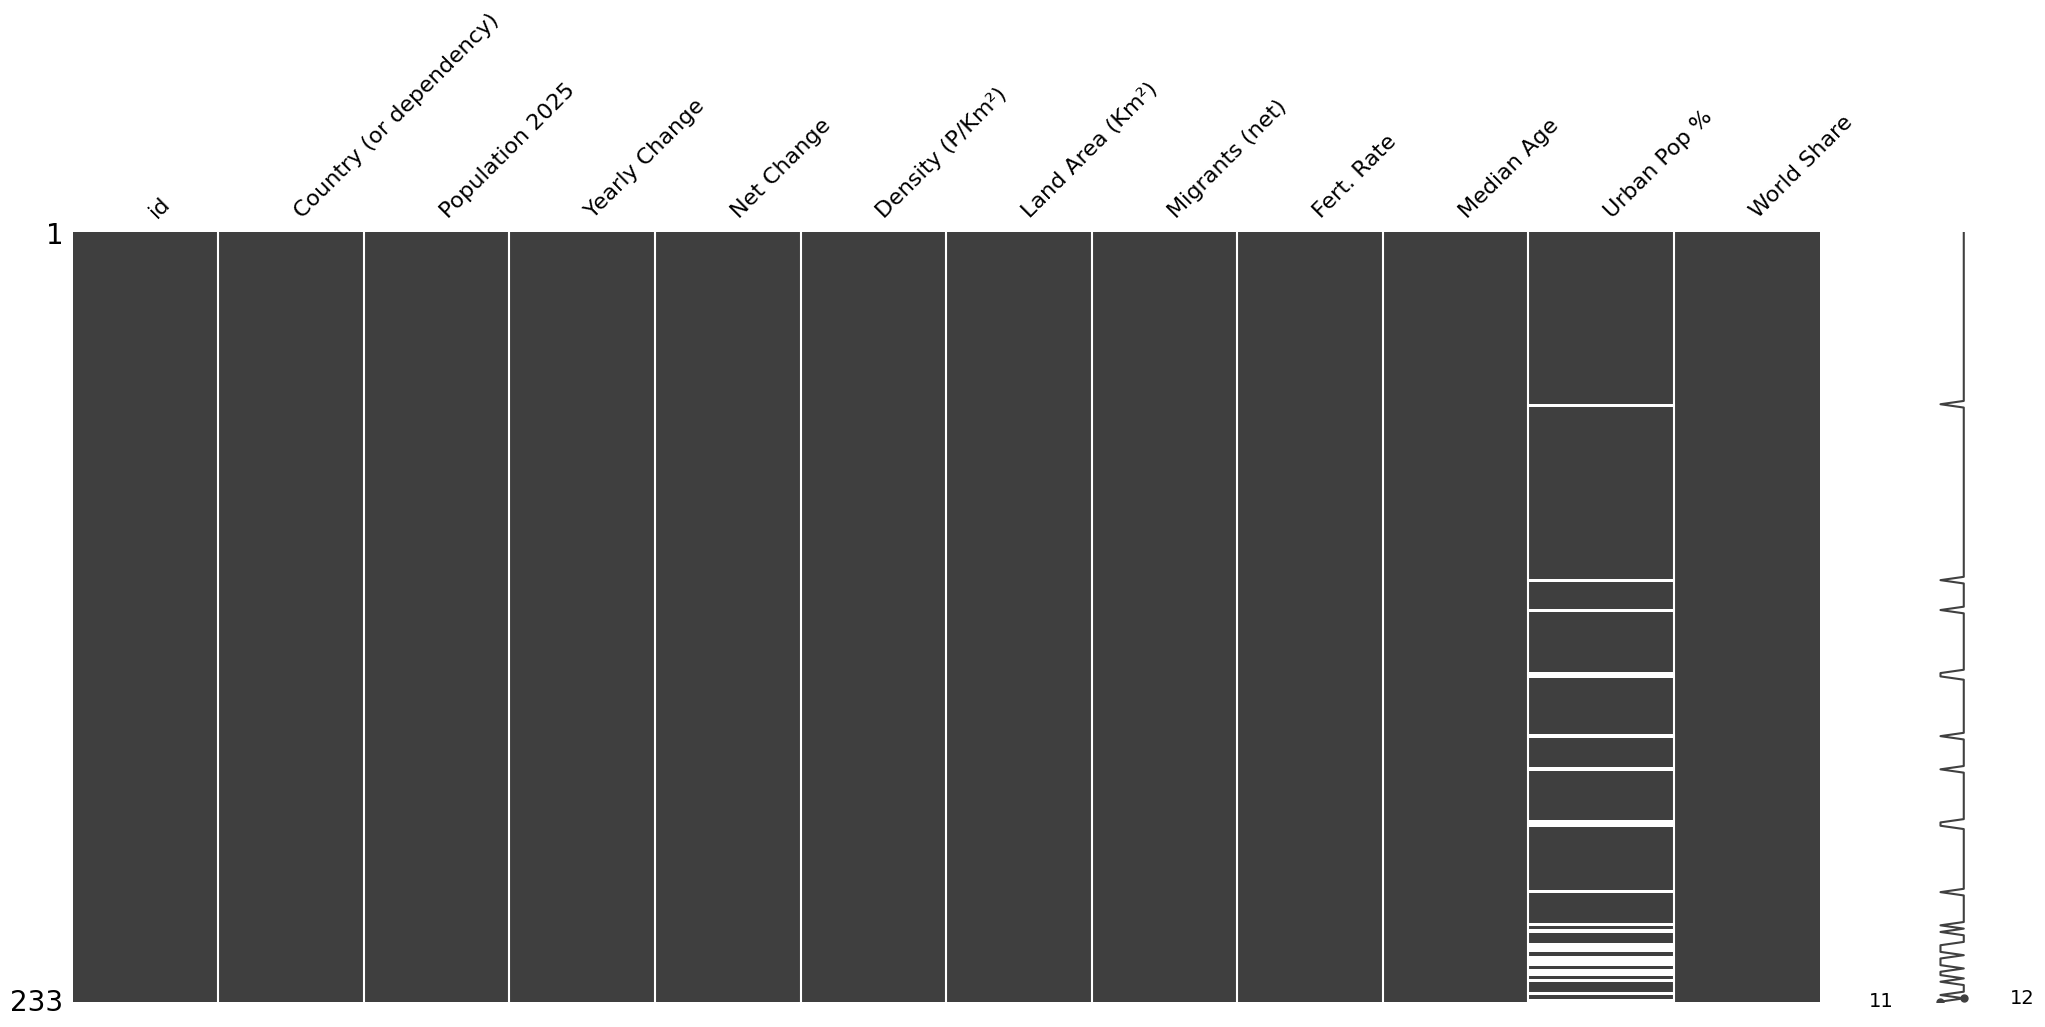

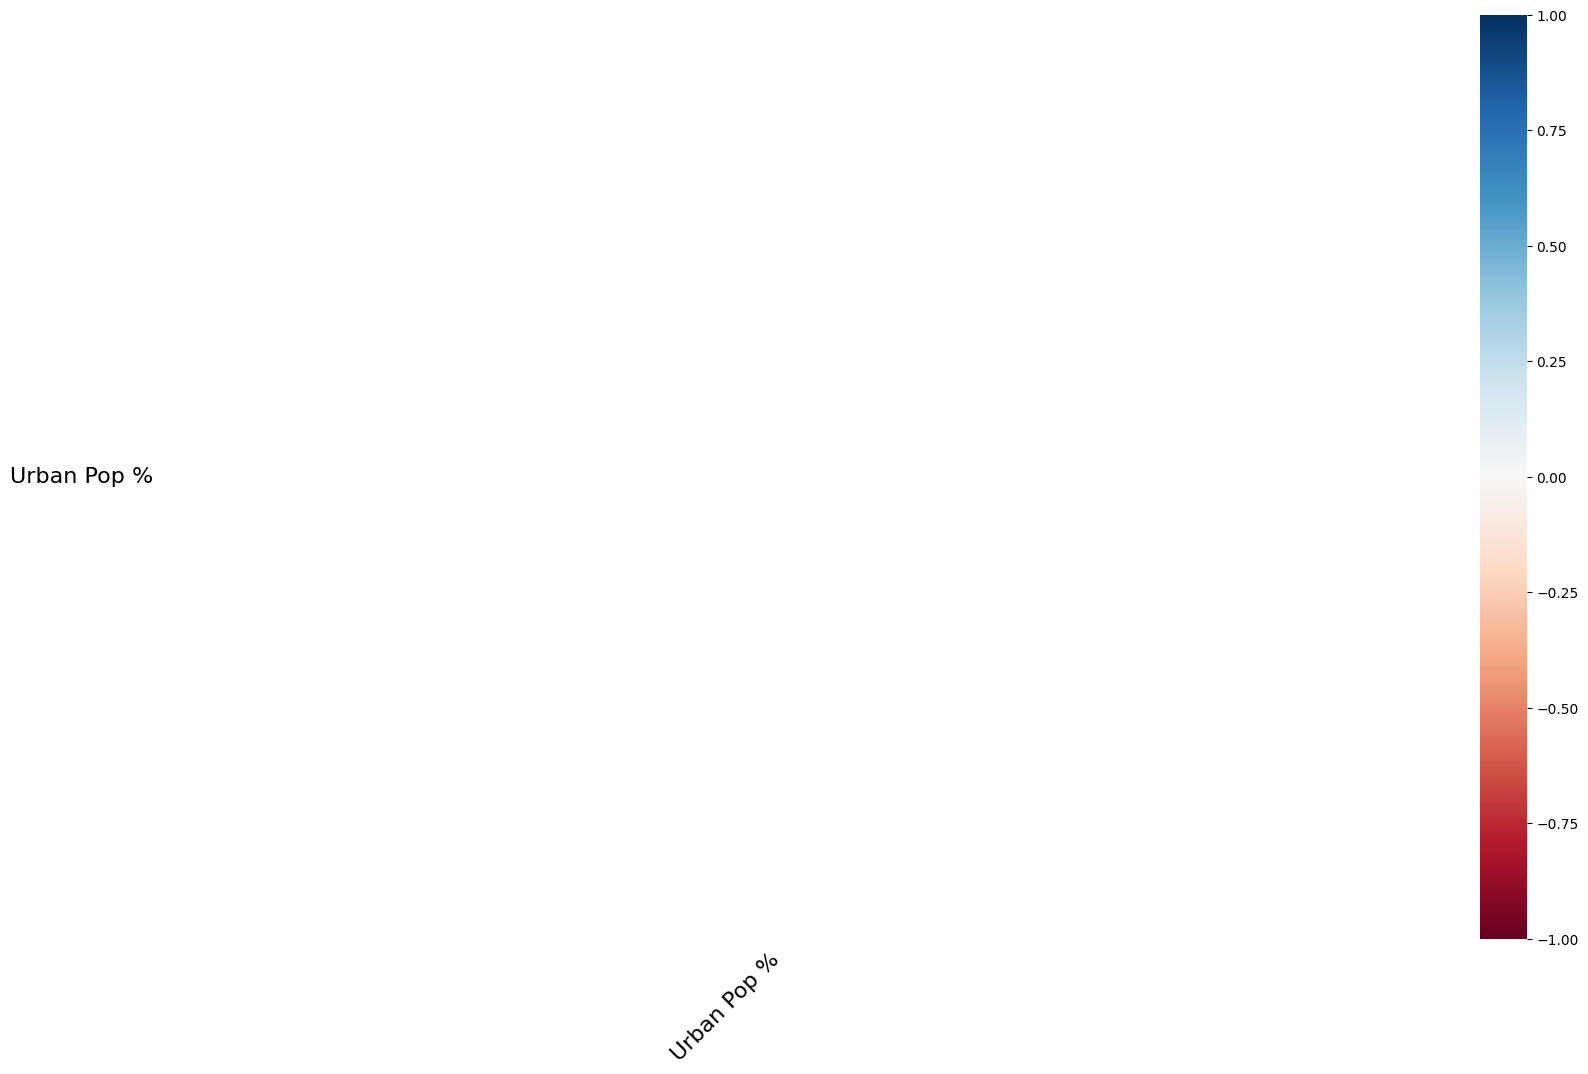

In [30]:
df_cleaned=df.dropna().copy()
df_filled=df.fillna(df.mean(numeric_only=True))
msno.matrix(df)
msno.heatmap(df)

In [41]:
print(df_cleaned.columns.tolist())

['id', 'Country (or dependency)', 'Population 2025', 'Yearly Change', 'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Median Age', 'Urban Pop %', 'World Share']


In [45]:
numeric_df=df_cleaned.select_dtypes(include=[np.number])
z_scores=np.abs(stats.zscore(numeric_df))
df_no_outliers=df_cleaned[(z_scores<3).all(axis=1)]
cols=['id', 'Population 2025', 'Yearly Change', 'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Median Age', 'Urban Pop %', 'World Share']
df_cleaned[cols]=df_cleaned[cols].apply(lambda x:pd.to_numeric(x,errors='coerce'))
upper_limit=df_cleaned[cols].quantile(.95)
df_cleaned[cols]=np.where(df_cleaned[cols]>upper_limit,upper_limit,df_cleaned[cols])

In [46]:
scaler=StandardScaler()
df_standardized=pd.DataFrame(scaler.fit_transform(numeric_df),columns=numeric_df.columns)

In [49]:
df_cleaned.to_csv('cleaned preprocessed data.csv',index=False)
print('Data cleaning and preprocessing complete. File saved as cleaned_preprocessed_data.csv')

Data cleaning and preprocessing complete. File saved as cleaned_preprocessed_data.csv


In [52]:
dx=pd.read_csv('cleaned preprocessed data.csv')
print(dx)

        id Country (or dependency)  Population 2025  Yearly Change  \
0      1.0                   India     1.239127e+08            NaN   
1      2.0                   China     1.239127e+08            NaN   
2      3.0           United States     1.239127e+08            NaN   
3      4.0               Indonesia     1.239127e+08            NaN   
4      5.0                Pakistan     1.239127e+08            NaN   
..     ...                     ...              ...            ...   
205  210.1                  Tuvalu     9.492000e+03            NaN   
206  210.1            Saint Helena     5.197000e+03            NaN   
207  210.1              Montserrat     4.359000e+03            NaN   
208  210.1        Falkland Islands     3.469000e+03            NaN   
209  210.1                    Niue     1.821000e+03            NaN   

     Net Change  Density (P/Km²)  Land Area (Km²)  Migrants (net)  Fert. Rate  \
0     1847086.1            492.0        2214238.0             NaN        1.94 